--- 
### 3-13장 Chest X-Ray images 1. EDA  
- https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia 
- 경진대회가 아닌 이미지셋만 주어짐 
- X-ray 이미지로 부터 정상 또는 폐렴 여부를 판별하는 문제 
- train / val /test 폴더에 각각 Normal/Pneumonia 폴더가 있다. (정상/폐렴의 이미지)
- 평가지표로 정확도, 재현율, F1-score 사용 
---

In [1]:
# 1. 데이터 로드 
import os
from glob import glob 

data_path = 'kaggle/input/chest-xray-pneumonia/chest_xray/'

train_path = os.path.join(data_path, 'train/')
val_path = os.path.join(data_path, 'val/')
test_path = os.path.join(data_path, 'test/')

print(f'훈련데이터 갯수: {len(glob(train_path + "*/*"))}')
print(f'검증데이터 갯수: {len(glob(val_path + "*/*"))}')
print(f'테스트데이터 갯수: {len(glob(test_path + "*/*"))}')

훈련데이터 갯수: 5216
검증데이터 갯수: 16
테스트데이터 갯수: 624


- 참고: glob 함수는 파일 경로를 패턴으로 찾아주는 함수, 즉  glob(train_path + "*/*") 는 train_path 폴더 아래 모든 폴더의 경로를 찾아준다

In [2]:
# 2. 타겟값별 이미지 갯수 확인
all_normal_images = []
all_pneumonia_images = []

for cat in ['train/', 'val/', 'test/']:
    data_cat_path = data_path + cat 
    # 정상, 폐렴 이미지 경로 
    normal_images = glob(data_cat_path + 'NORMAL/*')
    pneumonia_images = glob(data_cat_path + 'PNEUMONIA/*')
    # 정상, 폐렴 이미지 경로를 리스트에 추가 
    all_normal_images.extend(normal_images)
    all_pneumonia_images.extend(pneumonia_images)

print(f'정상 이미지 갯수 : {len(all_normal_images)} ')
print(f'폐렴 이미지 갯수 : {len(all_pneumonia_images)} ')

정상 이미지 갯수 : 1583 
폐렴 이미지 갯수 : 4273 


- 폐렴 이미지가 정상보다 약 3배 더 많다. 

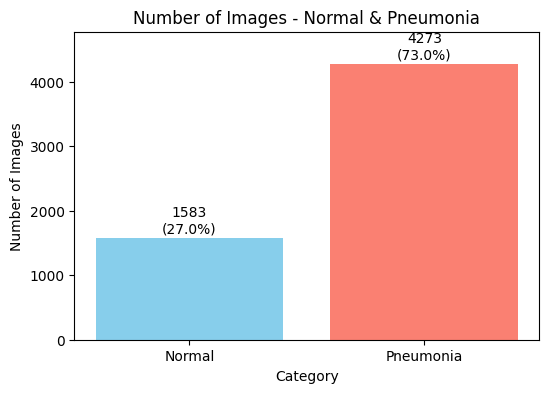

In [12]:
# 3. 시각화 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

# 데이터 준비
normal_count = len(all_normal_images)
pneumonia_count = len(all_pneumonia_images)

categories = ['Normal', 'Pneumonia']
counts = [normal_count, pneumonia_count]
total_count = sum(counts)  # 전체 이미지 개수 계산

mpl.rc('font', size=10)
plt.figure(figsize=(6, 4)) 

# 막대 그래프 생성
bars = plt.bar(categories, counts, color=['skyblue', 'salmon'])

plt.title('Number of Images - Normal & Pneumonia')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.ylim(0, max(counts) + 500)  # y축 여유 공간 추가

# 막대 위에 숫자와 비율(%) 표시
for bar, count in zip(bars, counts):
    percentage = (count / total_count) * 100  # 비율 계산
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # 막대 중심
        bar.get_height() + 30,              # 막대 위 약간 위
        f'{count}\n({percentage:.1f}%)',    # 숫자와 비율
        ha='center',                        # 가운데 정렬
        va='bottom'                         # 아래 정렬
    )


plt.show()

In [21]:
# 4. 실제 이미지 확인 
import cv2
import matplotlib.gridspec as gridspec 

def show_images(img_paths, rows = 2, cols = 3): 
    assert len(img_paths)  
    mpl.rc('font', size=8)
    plt.figure(figsize = (14,6))
    grid = gridspec.GridSpec(rows, cols)

    for idx, img_path in enumerate(img_paths): 
        image = cv2.imread(img_path)
        ax = plt.subplot(grid[idx]) 
        ax.imshow(image)

# 정상/폐렴 이미지 각 마지막 6장 
normal_img_path = all_normal_images[-6:]
pneumonia_img_path = all_pneumonia_images[-6:]

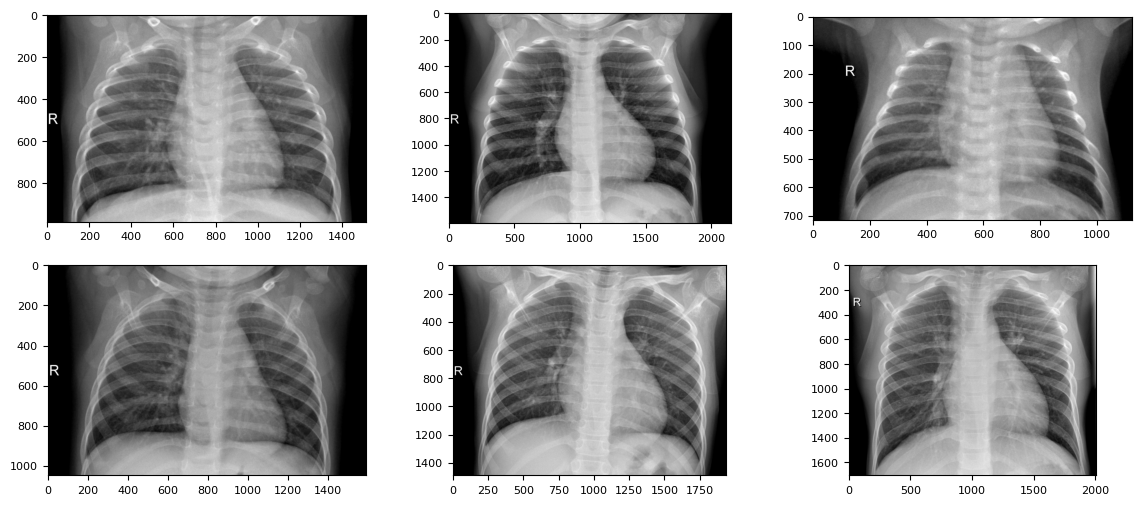

In [22]:
show_images(normal_img_path)

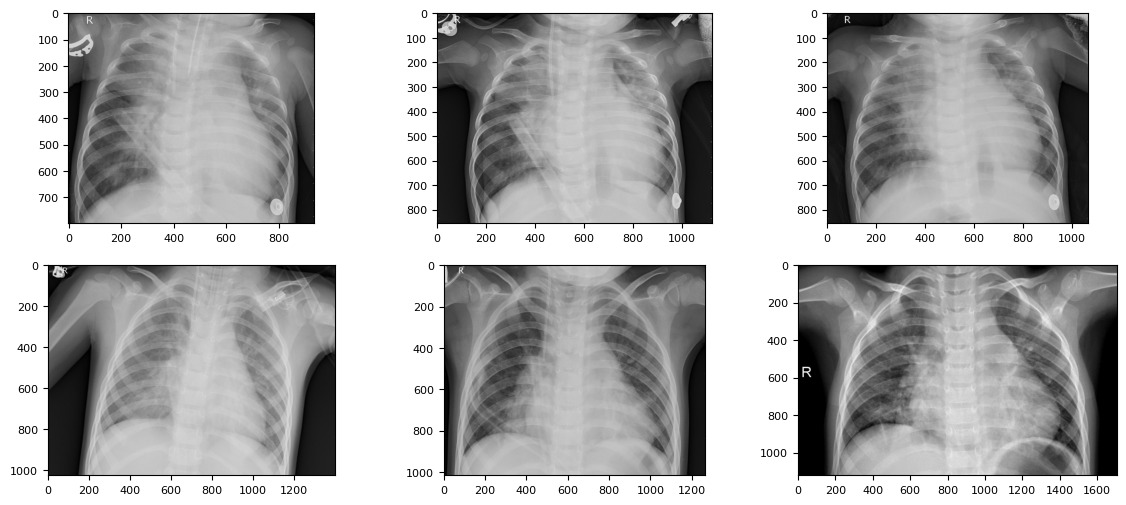

In [23]:
show_images(pneumonia_img_path)

- 이미지들의 가로x세로가 제 각각임, 전처리(Resize) 필요 